In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('トマトうちミニトマト-表1.csv')

In [3]:
#グラフ作成の障害になる0〜10行を削除する
df=df.drop(range(0,11))

In [4]:
#Unnamed: 1（都道府県の列）とUnnamed: 2 （収穫量の列）を抽出する
df=df[['Unnamed: 1','Unnamed: 4']]

In [5]:
#列の名前Unnamed: 1を都道府県に、Unnamed: 2 を収穫量に変更する
df=df.rename(columns={df.columns[0]:'都道府県',df.columns[1]:'収穫量'})

In [6]:
#indexを各都道府県名に置き換える
df = df.set_index('都道府県')

In [7]:
#収穫量を数値に変え、数値の桁を表すカンマを取り除く
df['収穫量'] = pd.to_numeric(df['収穫量'].str.replace(',', ''), errors='coerce')

In [8]:
#収穫量を降順にする
df = df.sort_values('収穫量', ascending=False)

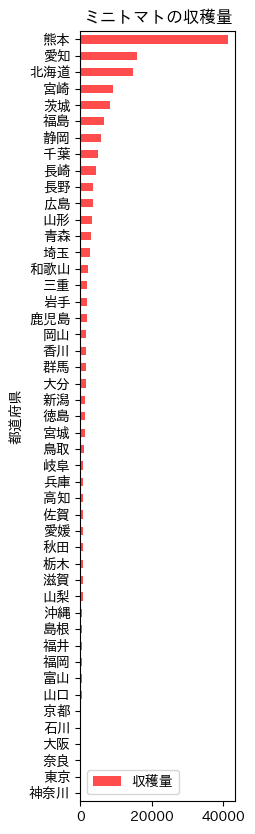

In [10]:
#matplotlibでは、DataFrameの降順が昇順になってしまうため、便宜上、逆に昇順とする
df_plot = df[::-1]

import matplotlib.pyplot as plt
import japanize_matplotlib
fig = plt.figure(figsize=(2, 10)) 
ax = fig.add_subplot(111)
df_plot.plot.barh(ax=ax, color='red',alpha=0.7)#棒グラフの色は赤に、透明度を0.7に設定する
df_plot
plt.legend()#凡例
plt.title('ミニトマトの収穫量')#タイトル
plt.show()